# Prediction using supervised learning

In this task we are going to predict the score of a student based on his/her working hours.  

This is a simple linear regression task as it involves only two variables in the data .
1 . number of hours
2 . percentage of score

# Steps to follow

1. Import data
2. Data exploration and manipulation
3. Preparing the data
4. Training the data
5. Making Predictions
6. Evoluating our model


# Code

lets start the code by importing the required libraries.

In [1]:
# pandas lib is used to do operations on tables 
import pandas as pd
# numpy lib is used to solve the mathematical operations on arrays
import numpy as np 
#matplotlib is used to visuallize the data
import matplotlib.pyplot as plt
#Seaborn is used for advanced vizualisation to get better idea and insights on the data
import seaborn as sns
%matplotlib inline

Import the data using url

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("data imported successfully")
df.head(20)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Manipulation and Analysis

In [3]:
# total number of rows
len(df)


25

In [4]:
# frequency in each variable 
print(df.count(), end="\n\n")
print(df.info())

Hours     25
Scores    25
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


<AxesSubplot:>

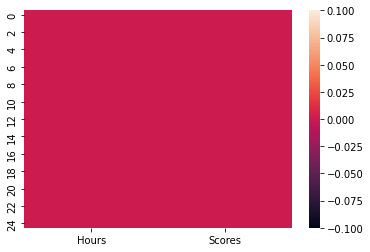

In [5]:
# check for missing values visually
sns.heatmap(df.isna(), cmap='rocket')

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


<AxesSubplot:>

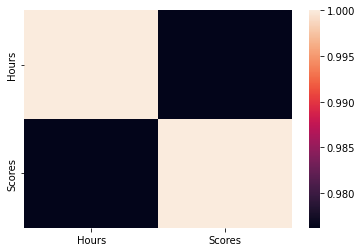

In [6]:
# checking linearity or the correlation among the varaibles for good fit
print(df.corr())
# correlation map
sns.heatmap(df.corr())

Sounds like no missing data


Now, lets plot the data

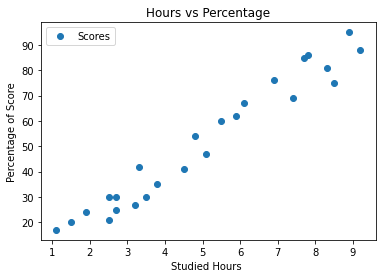

In [7]:
# Plotting the distribution of scores using matplotlib
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Studied Hours ')  
plt.ylabel('Percentage of Score')  
plt.show()

now ,Lets divide the data for input(hours) and output(Percentage)

# Preparing the data

Now that we have our attributes and labels,So our next step is to split the data into training and test data. We can do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
X_train

array([[2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

# Training and Algorithm

Now we are going to train our algorithm using linear regression method

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
print("Training is completed.")

Training is completed.


now lets plot the regression line

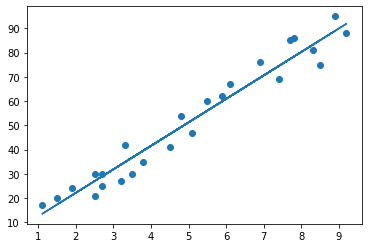

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [12]:
trainData = pd.DataFrame({'X_train':X_train.reshape(len(X_train)), 'Y_train':Y_train.reshape(len(Y_train))})
trainData

,X_train,Y_train
0,2.7,25
1,3.3,42
2,5.1,47
3,3.8,35
4,1.5,20
5,3.2,27
6,4.5,41
7,8.9,95
8,8.5,75
9,3.5,30


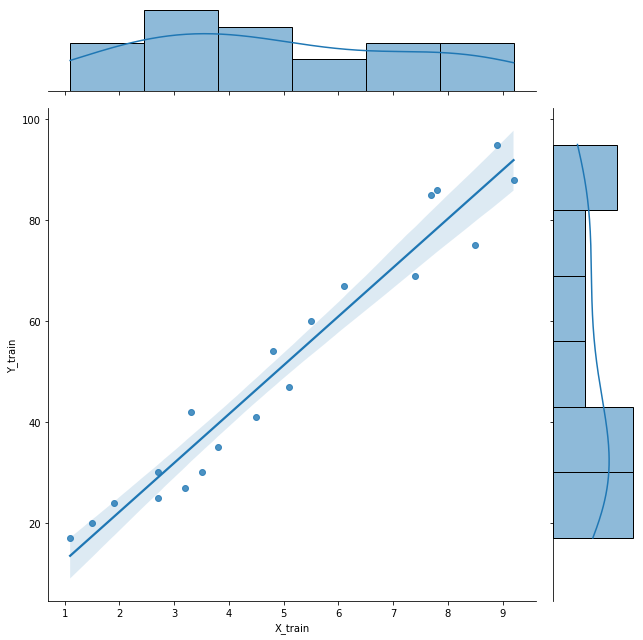

In [13]:
sns.jointplot(data=trainData, x= 'X_train', y='Y_train', kind='reg', height=9)

# Making Predictions

So lets start the predictions now

In [14]:
print("the test data of study hours per day : ")
print(X_test) 
Y_pred = regressor.predict(X_test) # Predicting the scores

the test data of study hours per day : 
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


Compare actual percentages with prediccted percentages using test data

In [15]:

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Now lets predict the percentage of the student when he study 9.25 hrs/day.

In [16]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.38611528261494


# Evaluation

now lets do the final step to  evaluate our model using mean absolute error.
MAE = |X-X1| + |x - X2| ...|x - Xn|/n  

where X = mean of actual values and Xi(i = 1,2,...n) = predicted values.

In [17]:
from sklearn import metrics  
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 3.9207511902099244
